In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [4]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [8]:
df.shape

(1025, 14)

In [9]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [10]:
df['sex'].value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64

In [11]:
for col in list(df):
    print(col)
    print(np.sort(df[col].unique()))

age
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
sex
['Female' 'Male']
chest_pain_type
['Asymptomatic' 'Atypical angina' 'Non-anginal pain' 'Typical angina']
resting_blood_pressure
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]
cholestoral
[126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 31

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\156487908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="bar", colormap ='viridis')
C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\156487908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="line", marker='+', color="red")


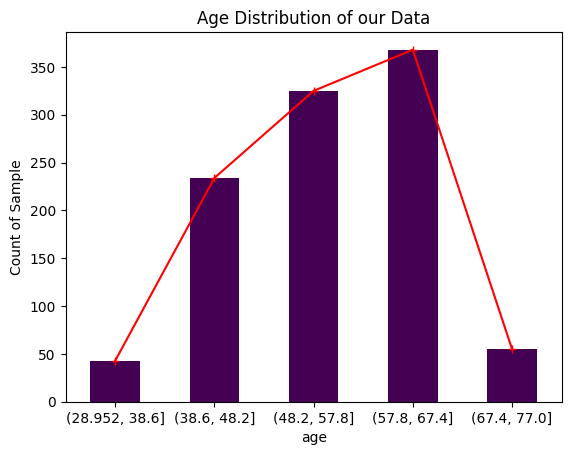

In [12]:
df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="bar", colormap ='viridis')
df.age.groupby(pd.cut(df.age, 5)).count().plot(kind="line", marker='+', color="red")
plt.tick_params(labelrotation=0)
plt.title("Age Distribution of our Data")
plt.ylabel("Count of Sample")
plt.show()

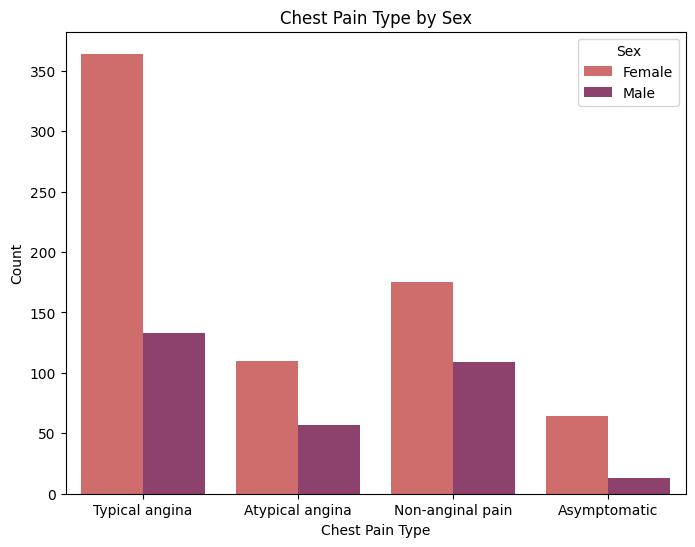

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='chest_pain_type', hue='sex', palette='flare')
plt.title('Chest Pain Type by Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\3029988311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='chest_pain_type', y='age', palette='flare')


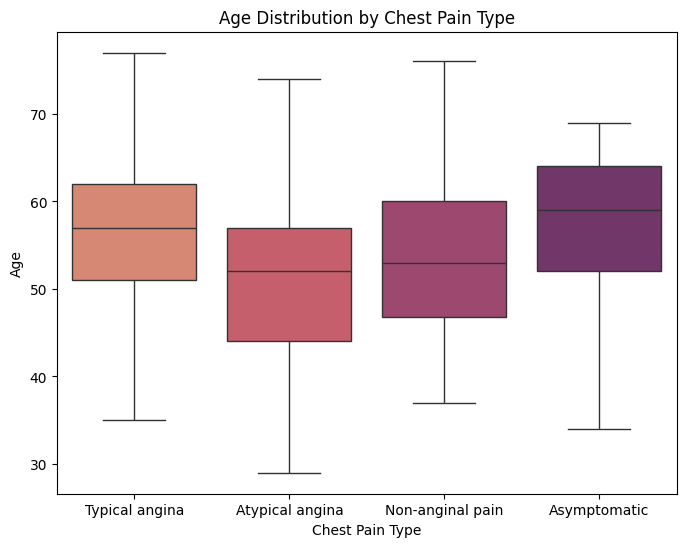

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='chest_pain_type', y='age', palette='flare')
plt.title('Age Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()

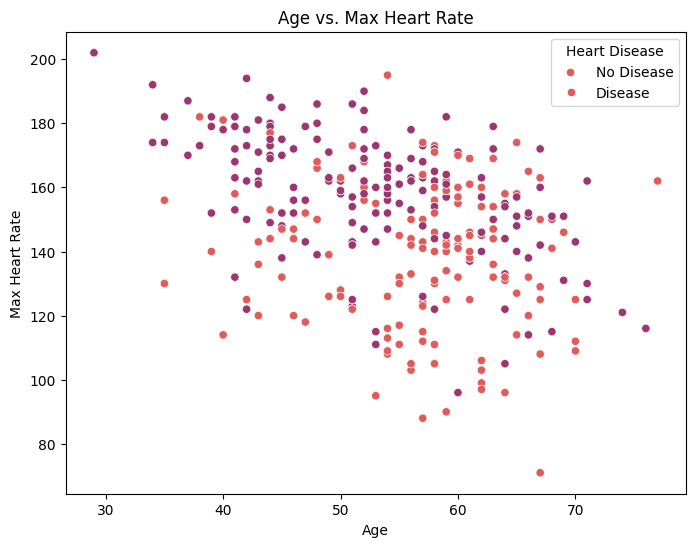

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='Max_heart_rate', hue='target', palette='flare')
plt.title('Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\722732934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resting_bp_target = pd.crosstab(df.resting_blood_pressure, df.target).groupby(


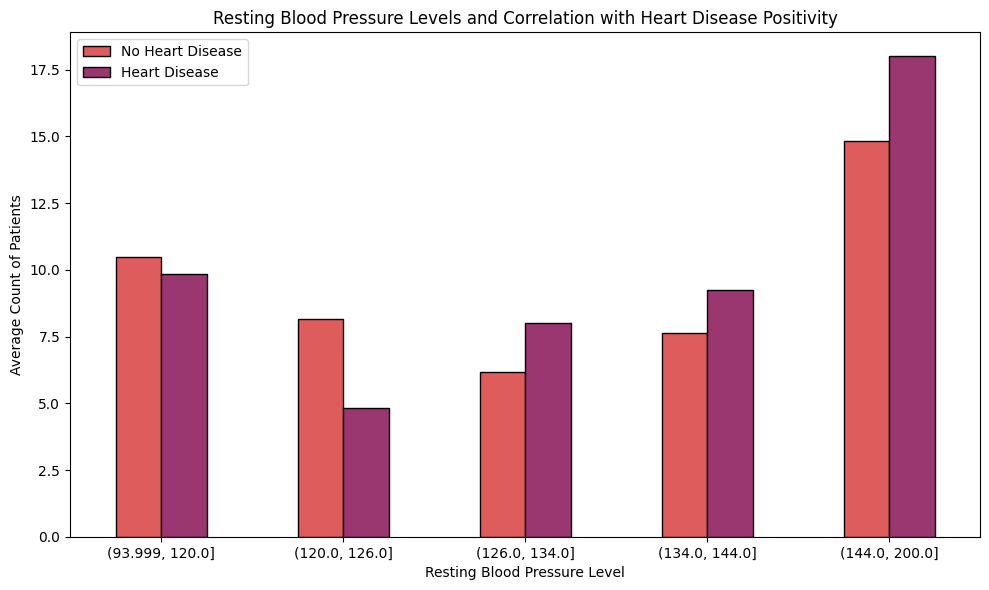

In [16]:
resting_bp_target = pd.crosstab(df.resting_blood_pressure, df.target).groupby(
    pd.qcut(df.resting_blood_pressure, 5)
).mean()

resting_bp_target.plot(
    kind="bar",
    figsize=(10, 6),
    color=sns.color_palette("flare", 2),
    edgecolor="black",
)

plt.legend(["No Heart Disease", "Heart Disease"], loc="upper left")
plt.ylabel("Average Count of Patients")
plt.xlabel("Resting Blood Pressure Level")
plt.title("Resting Blood Pressure Levels and Correlation with Heart Disease Positivity")
plt.tick_params(labelrotation=0)
plt.tight_layout()
plt.show()

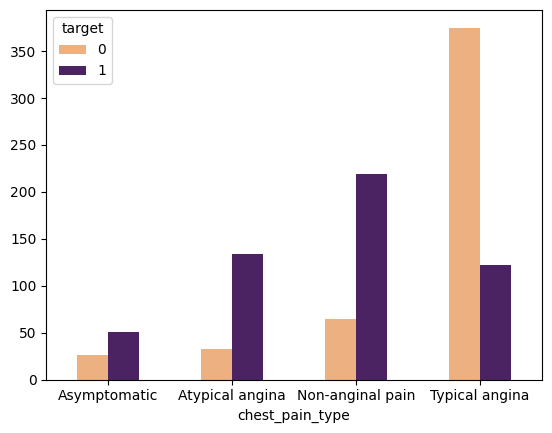

In [17]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind="bar", cmap = 'flare')
plt.xticks(rotation=0)
plt.show()

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\2551786047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cholesterol_target = pd.crosstab(df.cholestoral, df.target).groupby(


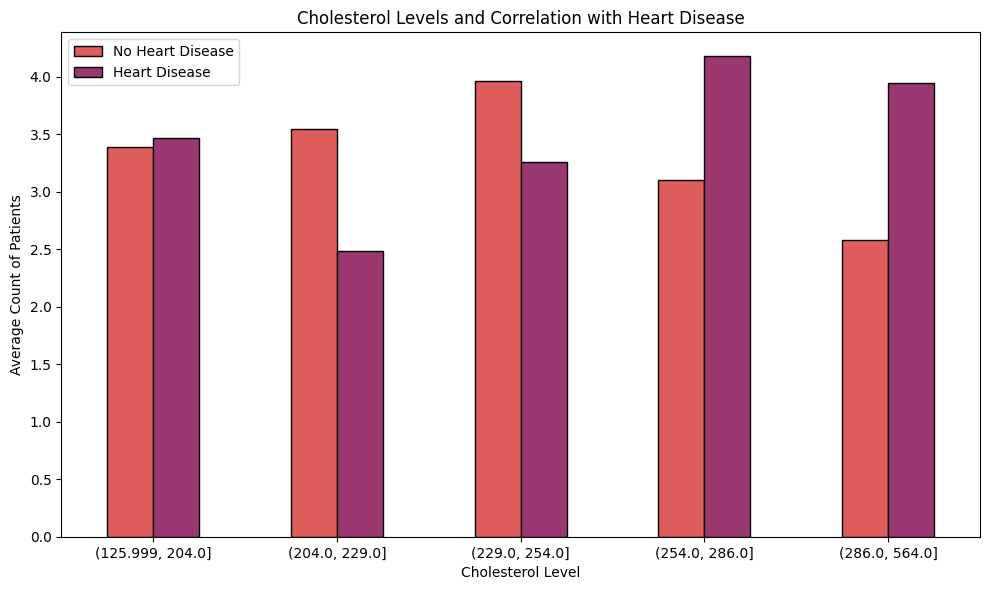

In [18]:
cholesterol_target = pd.crosstab(df.cholestoral, df.target).groupby(
    pd.qcut(df.cholestoral, 5)
).mean()

cholesterol_target.plot(
    kind="bar",
    figsize=(10, 6),
    color=sns.color_palette("flare", 2),
    edgecolor="black",
)

plt.legend(["No Heart Disease", "Heart Disease"], loc="upper left")
plt.ylabel("Average Count of Patients")
plt.xlabel("Cholesterol Level")
plt.title("Cholesterol Levels and Correlation with Heart Disease")
plt.tick_params(labelrotation=0)
plt.tight_layout()
plt.show()

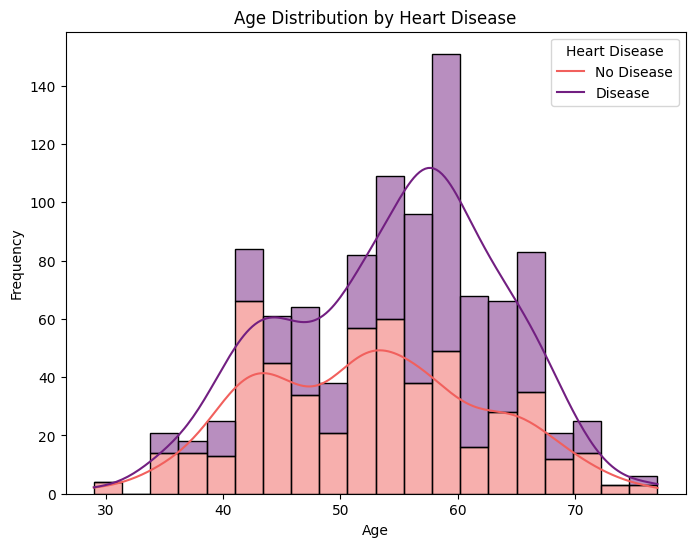

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, multiple='stack', palette='magma', bins=20)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

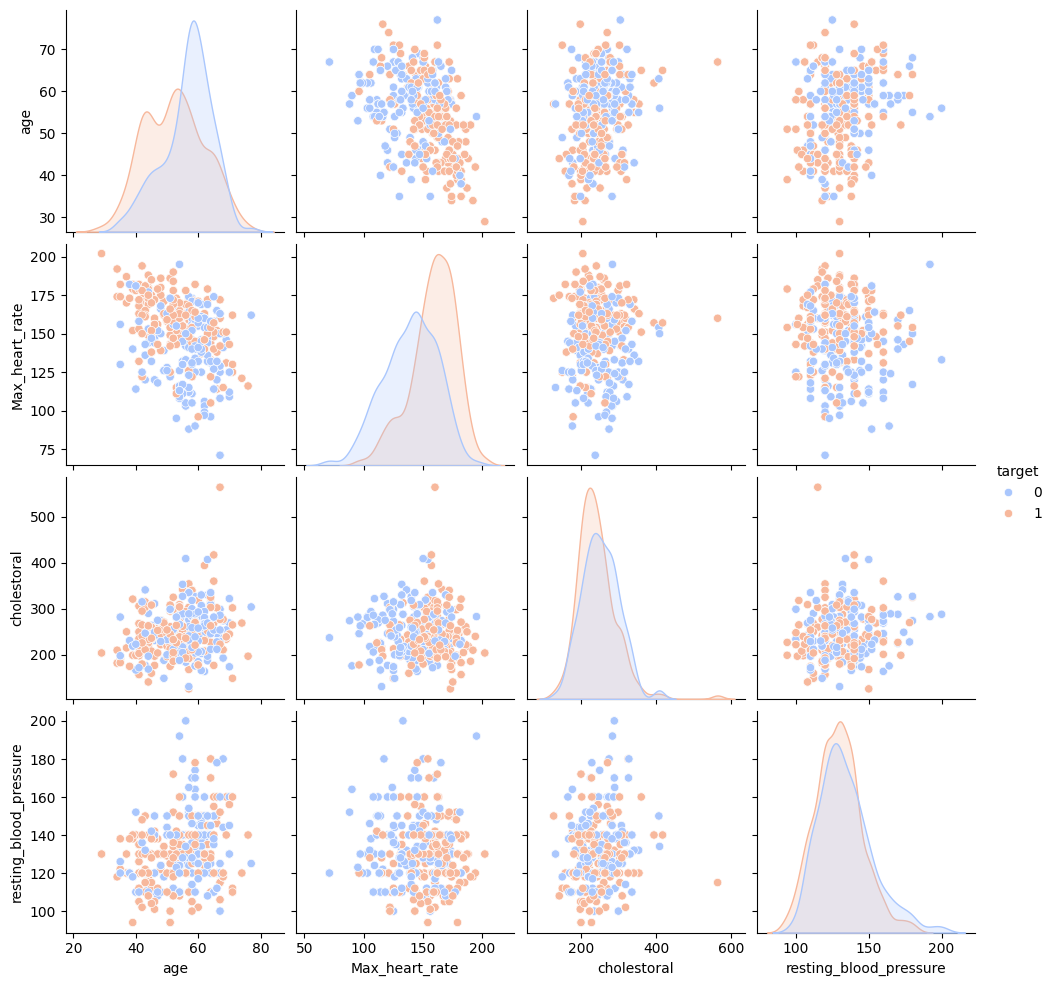

In [20]:
sns.pairplot(df, vars=['age', 'Max_heart_rate', 'cholestoral', 'resting_blood_pressure'], hue='target', palette='coolwarm', diag_kind='kde', height=2.5)
plt.show()

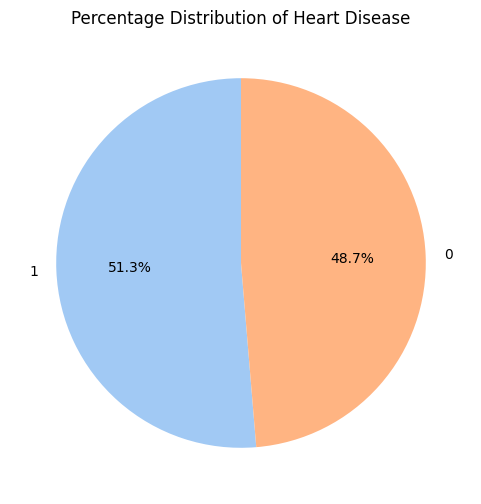

In [21]:
colors = sns.color_palette('pastel')[0:5]
target_counts = df['target'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
target_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Percentage Distribution of Heart Disease")
plt.ylabel('')
plt.show()

In [22]:
df["sex"].replace({"Male" : 1,"Female" : 0}, inplace=True)


df["chest_pain_type"].replace({"Typical angina" : 1,
                                  "Atypical angina" : 2,
                                  "Non-anginal pain" : 3,
                                  "Asymptomatic" : 4}, inplace=True)

df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
                                   "Lower than 120 mg/ml" : 0}, inplace=True)

df["rest_ecg"].replace({"Normal" : 0,
                       "ST-T wave abnormality" : 1,
                       "Left ventricular hypertrophy" : 2}, inplace=True)

df["exercise_induced_angina"].replace({"Yes" : 1,"No" : 0}, inplace=True)

df["slope"].replace({"Upsloping" : 1,
                     "Flat" : 2,
                     "Downsloping" : 3}, inplace=True)

df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
                                             "One" : 1,
                                             "Two" : 2,
                                             "Three" : 3,
                                             "Four" : 4}, inplace=True)

df["thalassemia"].replace({"Normal" : 3,
                        "Fixed Defect" : 6,
                        "Reversable Defect" : 7,
                          "No" : 0}, inplace=True)
df.head()

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\1535096226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace({"Male" : 1,"Female" : 0}, inplace=True)
C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\1535096226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"].replace

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,3,2,7,0
1,53,1,1,140,203,1,0,155,1,3.1,1,0,7,0
2,70,1,1,145,174,0,1,125,1,2.6,1,0,7,0
3,61,1,1,148,203,0,1,161,0,0.0,3,1,7,0
4,62,0,1,138,294,1,1,106,0,1.9,2,3,6,0


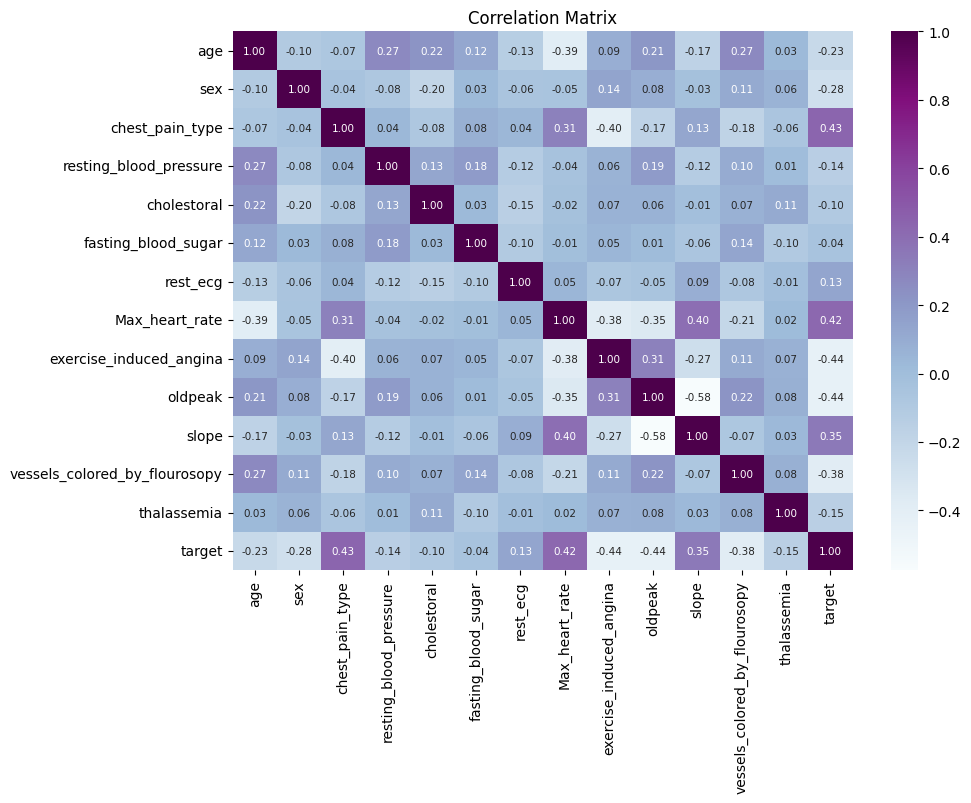

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap="BuPu", annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

In [25]:
X = df.drop(columns=["target"])
y = df["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Accuracy Score:
98.54%


In [27]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

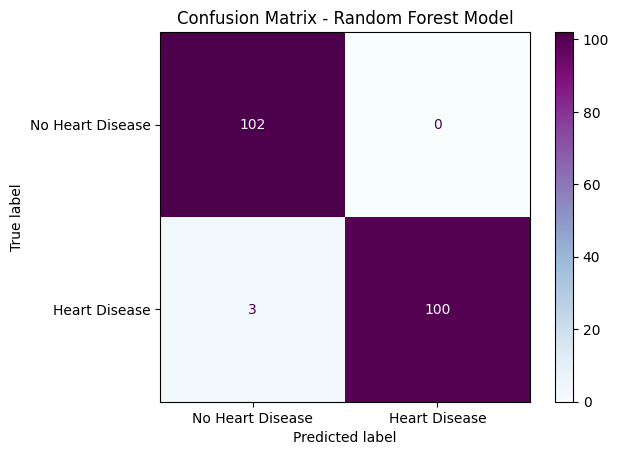

In [28]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='BuPu', colorbar=True)
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

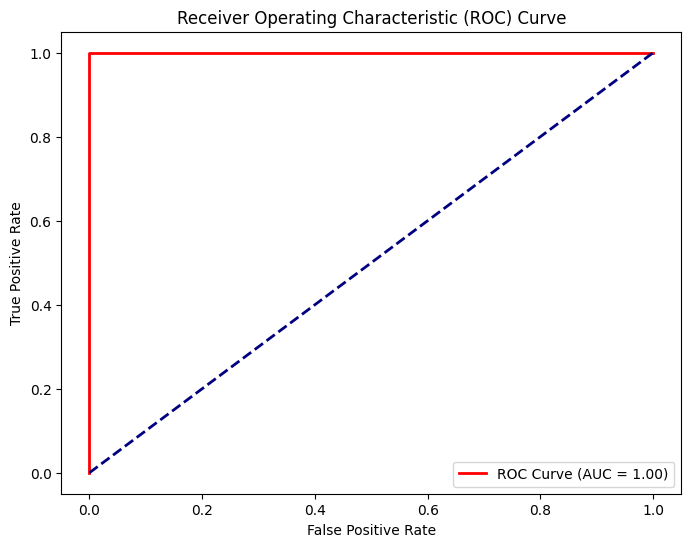

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="red", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

C:\Users\NICE\AppData\Local\Temp\ipykernel_13484\3670192385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=f_imp_df, palette="flare")


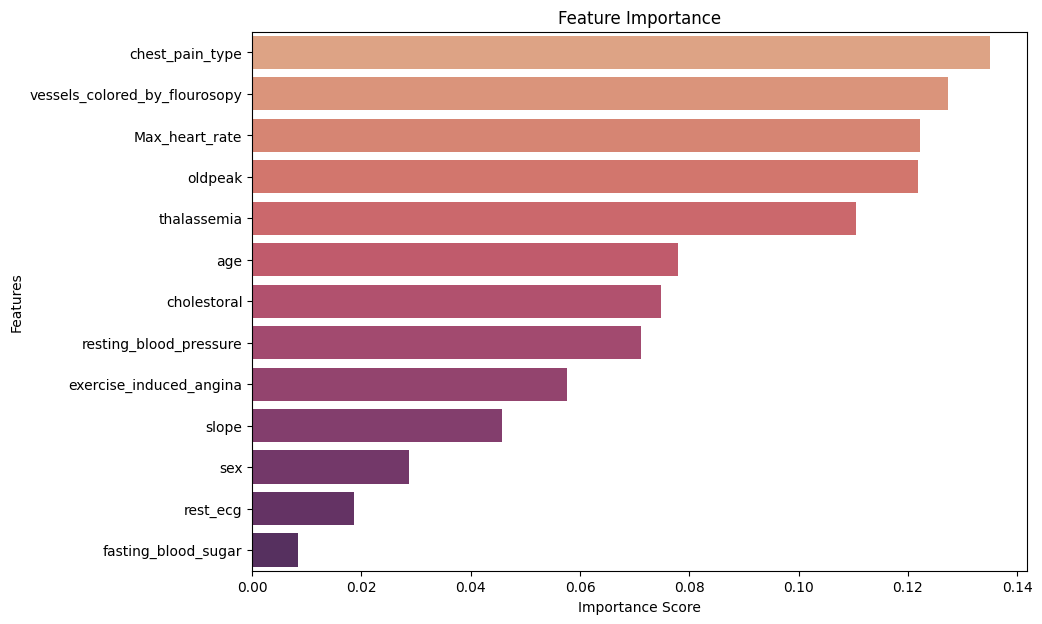

In [30]:
feature_importance = rf_model.feature_importances_
features = X.columns

f_imp_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
f_imp_df = f_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x="Importance", y="Feature", data=f_imp_df, palette="flare")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [31]:
print(f_imp_df)

                          Feature  Importance
2                 chest_pain_type    0.135072
11  vessels_colored_by_flourosopy    0.127327
7                  Max_heart_rate    0.122169
9                         oldpeak    0.121905
12                    thalassemia    0.110518
0                             age    0.077908
4                     cholestoral    0.074822
3          resting_blood_pressure    0.071171
8         exercise_induced_angina    0.057594
10                          slope    0.045782
1                             sex    0.028731
6                        rest_ecg    0.018557
5             fasting_blood_sugar    0.008444


In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9817073170731707


In [33]:
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of Tuned Model: {accuracy_tuned * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

Accuracy of Tuned Model: 98.54%
Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [35]:
ex_patient = df.iloc[0].values.tolist()
print(ex_patient)

[52.0, 1.0, 1.0, 125.0, 212.0, 0.0, 1.0, 168.0, 0.0, 1.0, 3.0, 2.0, 7.0, 0.0]


In [36]:
def predict_heart_disease(input_data):
    input_data = np.array(input_data).reshape(1, -1)
    prediction = best_model.predict(input_data)
    return "Heart Disease" if prediction == 1 else "No Heart Disease"

example_patient = [52.0, 1.0, 1.0, 125.0, 212.0, 0.0, 1.0, 168.0, 0.0, 1.0, 3.0, 2.0, 7.0] 
print(predict_heart_disease(example_patient))

No Heart Disease


C:\Users\NICE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
